# MNIST

## Reading the data

In [1]:
import numpy as np,tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (10,10)
legend_fontsize = 16

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [6]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [7]:
mnist.train.images.shape, mnist.test.images.shape

((55000, 784), (10000, 784))

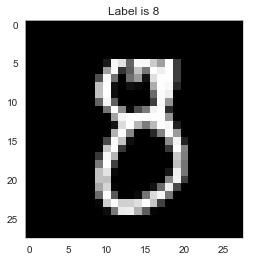

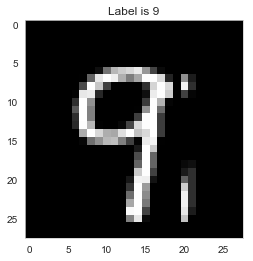

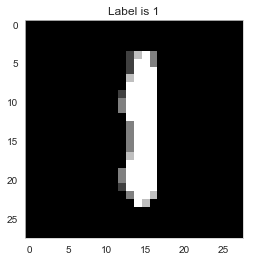

In [9]:
for i in range(2540,2543):
    pixels, label = mnist.train.images[i].reshape(28, 28), np.argmax(mnist.train.labels[i], axis=0)
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')
    plt.grid(False)
    plt.show()

## Logistic regression

In [11]:
x = tf.placeholder(tf.float32, [None, 784]) 
y_ = tf.placeholder(tf.float32, [None, 10])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x, W) + b)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [12]:
tf.gradients(cross_entropy, [W])

[<tf.Tensor 'gradients_2/MatMul_1_grad/MatMul_1:0' shape=(784, 10) dtype=float32>]

In [14]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [15]:
for i in range(1001):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    if i % 50 == 0:
        print("[%d]\ttrain accuracy=%.6f\ttest accuracy=%.6f" % (i,
            sess.run(accuracy, feed_dict={x: mnist.train.images, y_: mnist.train.labels}),
            sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
        ))

[0]	train accuracy=0.362218	test accuracy=0.365000
[50]	train accuracy=0.864455	test accuracy=0.874100
[100]	train accuracy=0.885164	test accuracy=0.892600
[150]	train accuracy=0.895945	test accuracy=0.901500
[200]	train accuracy=0.897255	test accuracy=0.906200
[250]	train accuracy=0.893018	test accuracy=0.900100
[300]	train accuracy=0.905018	test accuracy=0.910000
[350]	train accuracy=0.905109	test accuracy=0.910800
[400]	train accuracy=0.907255	test accuracy=0.912000
[450]	train accuracy=0.908527	test accuracy=0.911500
[500]	train accuracy=0.910273	test accuracy=0.915200
[550]	train accuracy=0.911673	test accuracy=0.914900
[600]	train accuracy=0.911873	test accuracy=0.916000
[650]	train accuracy=0.912764	test accuracy=0.916500
[700]	train accuracy=0.913673	test accuracy=0.914300
[750]	train accuracy=0.914491	test accuracy=0.918200
[800]	train accuracy=0.906345	test accuracy=0.908100
[850]	train accuracy=0.915309	test accuracy=0.916400
[900]	train accuracy=0.916927	test accuracy=0.920

## Two-layer network with ReLU

In [16]:
x = tf.placeholder(tf.float32, [None, 784]) 
y_ = tf.placeholder(tf.float32, [None, 10])

W_relu = tf.Variable(tf.truncated_normal([784, 200], stddev=0.1))
b_relu = tf.Variable(tf.truncated_normal([200], stddev=0.1))

W = tf.Variable(tf.zeros([200, 10]))
b = tf.Variable(tf.zeros([10]))

h = tf.nn.relu(tf.matmul(x, W_relu) + b_relu)

logit = tf.matmul(h, W) + b

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logit, labels=y_))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

y = tf.nn.softmax(logit)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [17]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [18]:
for i in range(1001):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    if i % 50 == 0:
        print("[%d]\ttrain accuracy=%.6f\ttest accuracy=%.6f" % (i,
            sess.run(accuracy, feed_dict={x: mnist.train.images, y_: mnist.train.labels}),
            sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
        ))

[0]	train accuracy=0.186927	test accuracy=0.187000
[50]	train accuracy=0.802673	test accuracy=0.804800
[100]	train accuracy=0.901073	test accuracy=0.907800
[150]	train accuracy=0.922836	test accuracy=0.927300
[200]	train accuracy=0.928055	test accuracy=0.930900
[250]	train accuracy=0.936255	test accuracy=0.938300
[300]	train accuracy=0.933691	test accuracy=0.937800
[350]	train accuracy=0.946036	test accuracy=0.947300
[400]	train accuracy=0.944509	test accuracy=0.943900
[450]	train accuracy=0.952945	test accuracy=0.954100
[500]	train accuracy=0.958836	test accuracy=0.959700
[550]	train accuracy=0.961000	test accuracy=0.960100
[600]	train accuracy=0.963236	test accuracy=0.961100
[650]	train accuracy=0.966127	test accuracy=0.962100
[700]	train accuracy=0.966200	test accuracy=0.963500
[750]	train accuracy=0.968127	test accuracy=0.961700
[800]	train accuracy=0.966564	test accuracy=0.964900
[850]	train accuracy=0.967545	test accuracy=0.964800
[900]	train accuracy=0.969109	test accuracy=0.965

## Dropout

In [19]:
x = tf.placeholder(tf.float32, [None, 784]) 
y_ = tf.placeholder(tf.float32, [None, 10])

W_relu = tf.Variable(tf.truncated_normal([784, 200], stddev=0.1))
b_relu = tf.Variable(tf.truncated_normal([200], stddev=0.1))

W = tf.Variable(tf.zeros([200, 10]))
b = tf.Variable(tf.zeros([10]))

h = tf.nn.relu(tf.matmul(x, W_relu) + b_relu)

keep_probability = tf.placeholder(tf.float32)
h_drop = tf.nn.dropout(h, keep_probability)

logit = tf.matmul(h_drop, W) + b
y = tf.nn.softmax(logit)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logit, labels=y_))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [20]:
sess = tf.Session()
sess.run(tf.initialize_all_variables())

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [21]:
for i in range(1001):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys, keep_probability : 0.5})
    if i % 50 == 0:
        print("[%d]\ttest accuracy=%.6f\ttrain accuracy=%.6f" % (i,
            sess.run(accuracy, feed_dict={x: mnist.train.images, y_: mnist.train.labels, keep_probability : 1.0}),
            sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_probability : 1.0})
        ))

[0]	test accuracy=0.396091	train accuracy=0.405200
[50]	test accuracy=0.841491	train accuracy=0.841900
[100]	test accuracy=0.900018	train accuracy=0.905600
[150]	test accuracy=0.898782	train accuracy=0.901300
[200]	test accuracy=0.915418	train accuracy=0.918700
[250]	test accuracy=0.928673	train accuracy=0.930300
[300]	test accuracy=0.938400	train accuracy=0.940000
[350]	test accuracy=0.940527	train accuracy=0.941600
[400]	test accuracy=0.944673	train accuracy=0.943600
[450]	test accuracy=0.948491	train accuracy=0.948000
[500]	test accuracy=0.948545	train accuracy=0.948900
[550]	test accuracy=0.953509	train accuracy=0.954500
[600]	test accuracy=0.951600	train accuracy=0.950200
[650]	test accuracy=0.956491	train accuracy=0.953500
[700]	test accuracy=0.958018	train accuracy=0.954000
[750]	test accuracy=0.959127	train accuracy=0.955500
[800]	test accuracy=0.961818	train accuracy=0.961500
[850]	test accuracy=0.960855	train accuracy=0.959500
[900]	test accuracy=0.962418	train accuracy=0.958

# MNIST on Keras

## Preprocessing

In [22]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.utils import np_utils
from keras import callbacks
from keras import optimizers, regularizers
# tf.python.control_flow_ops = tf

Using TensorFlow backend.


In [25]:
(x_train, y_train), (x_test, y_test) = mnist.load_data('/Users/snikolenko/Downloads/mnist.npz')
X_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
X_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

batch_size = 100

In [26]:
X_train.shape

(60000, 784)

## Logistic regression

In [27]:
model = Sequential()
model.add(Dense(10, input_shape=(784,), activation='softmax'))
# model.add(Activation('softmax'))

In [28]:
sgd = optimizers.SGD(lr=0.5)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [29]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=20,
          verbose=1, validation_data=(X_test, Y_test),
         callbacks=[callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1),
#                    ModelCheckpoint(kfold_weights_path, monitor='val_loss', save_best_only=True, verbose=0)
                   ])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.3930 - acc: 0.8873 - val_loss: 0.3089 - val_acc: 0.9119
Epoch 2/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.3071 - acc: 0.9128 - val_loss: 0.2899 - val_acc: 0.9170
Epoch 3/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.2923 - acc: 0.9176 - val_loss: 0.2753 - val_acc: 0.9230
Epoch 4/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.2852 - acc: 0.9200 - val_loss: 0.2809 - val_acc: 0.9220
Epoch 5/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.2785 - acc: 0.9220 - val_loss: 0.2722 - val_acc: 0.9236
Epoch 6/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.2756 - acc: 0.9229 - val_loss: 0.2753 - val_acc: 0.9206
Epoch 7/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.2722 - acc: 0.9241 - val_loss: 0.2737 - val_acc

In [30]:
model = Sequential()
model.add(Dense(10, input_shape=(784,)))
model.add(Activation('softmax'))
sgd = optimizers.SGD(lr=0.5)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=10,
          verbose=1, validation_data=(X_test, Y_test),
         callbacks=[callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 25us/step - loss: 0.3940 - acc: 0.8868 - val_loss: 0.3044 - val_acc: 0.9155
Epoch 2/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.3068 - acc: 0.9128 - val_loss: 0.2868 - val_acc: 0.9205
Epoch 3/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.2917 - acc: 0.9181 - val_loss: 0.2867 - val_acc: 0.9205
Epoch 4/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.2850 - acc: 0.9192 - val_loss: 0.2890 - val_acc: 0.9189
Epoch 5/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.2789 - acc: 0.9209 - val_loss: 0.2726 - val_acc: 0.9227
Epoch 6/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.2755 - acc: 0.9228 - val_loss: 0.2843 - val_acc: 0.9224
Epoch 7/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.2716 - acc: 0.9246 - val_loss: 0.2733 - val_acc

## One hidden layer

In [31]:
model = Sequential()
model.add(Dense(200, input_shape=(784,)))
model.add(Activation('tanh'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [32]:
sgd = optimizers.SGD(lr=0.1)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [33]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=10,
          verbose=1, validation_data=(X_test, Y_test))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.4220 - acc: 0.8841 - val_loss: 0.2902 - val_acc: 0.9159
Epoch 2/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.2743 - acc: 0.9220 - val_loss: 0.2464 - val_acc: 0.9280
Epoch 3/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.2300 - acc: 0.9342 - val_loss: 0.2065 - val_acc: 0.9405
Epoch 4/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.1962 - acc: 0.9448 - val_loss: 0.1809 - val_acc: 0.9468
Epoch 5/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.1713 - acc: 0.9519 - val_loss: 0.1647 - val_acc: 0.9542
Epoch 6/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.1515 - acc: 0.9580 - val_loss: 0.1460 - val_acc: 0.9585
Epoch 7/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.1358 - acc: 0.9616 - val_loss: 0.1415 - val_acc

In [34]:
model = Sequential()
model.add(Dense(200, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [35]:
sgd = optimizers.SGD(lr=0.1)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [36]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=10,
          verbose=1, validation_data=(X_test, Y_test))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.4175 - acc: 0.8875 - val_loss: 0.2556 - val_acc: 0.9287
Epoch 2/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.2353 - acc: 0.9336 - val_loss: 0.1963 - val_acc: 0.9447
Epoch 3/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.1841 - acc: 0.9484 - val_loss: 0.1658 - val_acc: 0.9524
Epoch 4/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.1516 - acc: 0.9577 - val_loss: 0.1413 - val_acc: 0.9585
Epoch 5/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.1295 - acc: 0.9639 - val_loss: 0.1249 - val_acc: 0.9629
Epoch 6/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.1131 - acc: 0.9681 - val_loss: 0.1165 - val_acc: 0.9668
Epoch 7/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.1004 - acc: 0.9719 - val_loss: 0.1060 - val_acc

## Adding more layers

In [37]:
model = Sequential()
model.add(Dense(200, input_shape=(784,), W_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(200, W_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_shape=(784,), kernel_regularizer=<keras.reg...)`
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_regularizer=<keras.reg...)`
  """


In [38]:
sgd = optimizers.SGD(lr=0.1)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [39]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=10,
          verbose=1, validation_data=(X_test, Y_test),
         callbacks=[callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 69us/step - loss: 1.0180 - acc: 0.8397 - val_loss: 0.6623 - val_acc: 0.9363
Epoch 2/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.6750 - acc: 0.9208 - val_loss: 0.5358 - val_acc: 0.9494
Epoch 3/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.5562 - acc: 0.9367 - val_loss: 0.4442 - val_acc: 0.9599
Epoch 4/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.4733 - acc: 0.9446 - val_loss: 0.3798 - val_acc: 0.9640
Epoch 5/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.4110 - acc: 0.9508 - val_loss: 0.3294 - val_acc: 0.9682
Epoch 6/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.3642 - acc: 0.9543 - val_loss: 0.2948 - val_acc: 0.9692
Epoch 7/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.3277 - acc: 0.9575 - val_loss: 0.2636 - val_acc

## Dropout

In [40]:
model = Sequential()
model.add(Dense(500, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

In [41]:
sgd = optimizers.SGD(lr=0.1)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [42]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=10,
          verbose=1, validation_data=(X_test, Y_test))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.4677 - acc: 0.8642 - val_loss: 0.2428 - val_acc: 0.9305
Epoch 2/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.2576 - acc: 0.9259 - val_loss: 0.1812 - val_acc: 0.9476
Epoch 3/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.2021 - acc: 0.9419 - val_loss: 0.1484 - val_acc: 0.9562
Epoch 4/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.1714 - acc: 0.9509 - val_loss: 0.1288 - val_acc: 0.9613
Epoch 5/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.1506 - acc: 0.9565 - val_loss: 0.1143 - val_acc: 0.9658
Epoch 6/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.1340 - acc: 0.9609 - val_loss: 0.1048 - val_acc: 0.9694
Epoch 7/10
60000/60000 [==============================] - 4s 75us/step - loss: 0.1235 - acc: 0.9640 - val_loss: 0.0961 - val_acc

## Weight initialization

In [43]:
model = Sequential()
model.add(Dense(200, init='he_uniform', input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_shape=(784,), kernel_initializer="he_uniform")`
  


In [44]:
sgd = optimizers.SGD(lr=0.1)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [45]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=10,
          verbose=1, validation_data=(X_test, Y_test))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.4185 - acc: 0.8863 - val_loss: 0.2534 - val_acc: 0.9317
Epoch 2/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.2321 - acc: 0.9349 - val_loss: 0.1948 - val_acc: 0.9452
Epoch 3/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.1815 - acc: 0.9490 - val_loss: 0.1614 - val_acc: 0.9553
Epoch 4/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.1500 - acc: 0.9576 - val_loss: 0.1377 - val_acc: 0.9608
Epoch 5/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.1287 - acc: 0.9631 - val_loss: 0.1215 - val_acc: 0.9658
Epoch 6/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.1124 - acc: 0.9686 - val_loss: 0.1113 - val_acc: 0.9674
Epoch 7/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0998 - acc: 0.9718 - val_loss: 0.1020 - val_acc

In [46]:
model = Sequential()
model.add(Dense(200, init='glorot_uniform', input_shape=(784,)))
model.add(Activation('tanh'))
model.add(Dense(10))
model.add(Activation('softmax'))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_shape=(784,), kernel_initializer="glorot_uniform")`
  


In [47]:
sgd = optimizers.SGD(lr=0.1)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [48]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=10,
          verbose=1, validation_data=(X_test, Y_test))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.4267 - acc: 0.8833 - val_loss: 0.2890 - val_acc: 0.9183
Epoch 2/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.2754 - acc: 0.9209 - val_loss: 0.2415 - val_acc: 0.9311
Epoch 3/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.2314 - acc: 0.9339 - val_loss: 0.2050 - val_acc: 0.9425
Epoch 4/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.1969 - acc: 0.9448 - val_loss: 0.1851 - val_acc: 0.9466
Epoch 5/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.1713 - acc: 0.9519 - val_loss: 0.1594 - val_acc: 0.9546
Epoch 6/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.1513 - acc: 0.9573 - val_loss: 0.1470 - val_acc: 0.9582
Epoch 7/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.1354 - acc: 0.9619 - val_loss: 0.1341 - val_acc

## Batch normalization

In [49]:
model = Sequential()
model.add(Dense(200, input_shape=(784,)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(10))
model.add(Activation('softmax'))

In [50]:
sgd = optimizers.SGD(lr=0.1)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [51]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=40,
          verbose=1, validation_data=(X_test, Y_test))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 4s 71us/step - loss: 0.2264 - acc: 0.9338 - val_loss: 0.1255 - val_acc: 0.9636
Epoch 2/40
60000/60000 [==============================] - 3s 58us/step - loss: 0.1044 - acc: 0.9695 - val_loss: 0.0981 - val_acc: 0.9708
Epoch 3/40
60000/60000 [==============================] - 4s 63us/step - loss: 0.0721 - acc: 0.9794 - val_loss: 0.0932 - val_acc: 0.9705
Epoch 4/40
60000/60000 [==============================] - 4s 59us/step - loss: 0.0564 - acc: 0.9840 - val_loss: 0.0762 - val_acc: 0.9756
Epoch 5/40
60000/60000 [==============================] - 4s 66us/step - loss: 0.0433 - acc: 0.9877 - val_loss: 0.0748 - val_acc: 0.9767
Epoch 6/40
60000/60000 [==============================] - 3s 54us/step - loss: 0.0355 - acc: 0.9906 - val_loss: 0.0745 - val_acc: 0.9781
Epoch 7/40
60000/60000 [==============================] - 4s 62us/step - loss: 0.0280 - acc: 0.9931 - val_loss: 0.0749 - val_acc

## Comparing optimizers on a network with one hidden ReLU layer

In [52]:
model = Sequential()
model.add(Dense(200, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [53]:
sgd = optimizers.SGD(lr=0.1)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [54]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=10,
          verbose=1, validation_data=(X_test, Y_test))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.4210 - acc: 0.8842 - val_loss: 0.2546 - val_acc: 0.9281
Epoch 2/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.2323 - acc: 0.9351 - val_loss: 0.1976 - val_acc: 0.9452
Epoch 3/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.1815 - acc: 0.9487 - val_loss: 0.1661 - val_acc: 0.9506
Epoch 4/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.1498 - acc: 0.9582 - val_loss: 0.1369 - val_acc: 0.9612
Epoch 5/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.1271 - acc: 0.9646 - val_loss: 0.1242 - val_acc: 0.9635
Epoch 6/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.1108 - acc: 0.9693 - val_loss: 0.1107 - val_acc: 0.9674
Epoch 7/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0982 - acc: 0.9732 - val_loss: 0.1026 - val_acc

In [55]:
model = Sequential()
model.add(Dense(200, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
sgd = optimizers.SGD(lr=0.1, momentum=0.9)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [56]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=10,
          verbose=1, validation_data=(X_test, Y_test))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.2333 - acc: 0.9301 - val_loss: 0.1122 - val_acc: 0.9625
Epoch 2/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0940 - acc: 0.9712 - val_loss: 0.1005 - val_acc: 0.9697
Epoch 3/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0654 - acc: 0.9795 - val_loss: 0.0753 - val_acc: 0.9772
Epoch 4/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0482 - acc: 0.9846 - val_loss: 0.0642 - val_acc: 0.9811
Epoch 5/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0372 - acc: 0.9886 - val_loss: 0.0793 - val_acc: 0.9743
Epoch 6/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0280 - acc: 0.9914 - val_loss: 0.0721 - val_acc: 0.9796
Epoch 7/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0215 - acc: 0.9934 - val_loss: 0.0681 - val_acc

In [57]:
model = Sequential()
model.add(Dense(200, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
sgd = optimizers.SGD(lr=0.1, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [58]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=10,
          verbose=1, validation_data=(X_test, Y_test))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.2263 - acc: 0.9317 - val_loss: 0.1161 - val_acc: 0.9655
Epoch 2/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.0949 - acc: 0.9716 - val_loss: 0.0849 - val_acc: 0.9728
Epoch 3/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.0661 - acc: 0.9797 - val_loss: 0.0857 - val_acc: 0.9735
Epoch 4/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0479 - acc: 0.9848 - val_loss: 0.0767 - val_acc: 0.9749
Epoch 5/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.0373 - acc: 0.9881 - val_loss: 0.0671 - val_acc: 0.9798
Epoch 6/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.0276 - acc: 0.9912 - val_loss: 0.0757 - val_acc: 0.9793
Epoch 7/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0219 - acc: 0.9934 - val_loss: 0.0744 - val_acc

In [59]:
model = Sequential()
model.add(Dense(200, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
sgd = optimizers.RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [60]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=10,
          verbose=1, validation_data=(X_test, Y_test))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.2752 - acc: 0.9229 - val_loss: 0.1850 - val_acc: 0.9502
Epoch 2/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.1405 - acc: 0.9648 - val_loss: 0.1452 - val_acc: 0.9704
Epoch 3/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.1191 - acc: 0.9730 - val_loss: 0.1943 - val_acc: 0.9627
Epoch 4/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.1110 - acc: 0.9766 - val_loss: 0.2167 - val_acc: 0.9614
Epoch 5/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.0947 - acc: 0.9812 - val_loss: 0.1827 - val_acc: 0.9691
Epoch 6/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0906 - acc: 0.9831 - val_loss: 0.1884 - val_acc: 0.9747
Epoch 7/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.0887 - acc: 0.9843 - val_loss: 0.1824 - val_acc

In [61]:
model = Sequential()
model.add(Dense(200, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
sgd = optimizers.Adagrad()
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [62]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=10,
          verbose=1, validation_data=(X_test, Y_test))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.2608 - acc: 0.9265 - val_loss: 0.1672 - val_acc: 0.9511
Epoch 2/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.1502 - acc: 0.9580 - val_loss: 0.1366 - val_acc: 0.9612
Epoch 3/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.1229 - acc: 0.9660 - val_loss: 0.1203 - val_acc: 0.9654
Epoch 4/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.1068 - acc: 0.9706 - val_loss: 0.1120 - val_acc: 0.9661
Epoch 5/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0953 - acc: 0.9738 - val_loss: 0.1060 - val_acc: 0.9690
Epoch 6/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.0867 - acc: 0.9764 - val_loss: 0.1003 - val_acc: 0.9702
Epoch 7/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.0796 - acc: 0.9785 - val_loss: 0.0961 - val_acc

In [63]:
model = Sequential()
model.add(Dense(200, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
sgd = optimizers.Adadelta()
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [64]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=10,
          verbose=1, validation_data=(X_test, Y_test))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.3192 - acc: 0.9104 - val_loss: 0.1906 - val_acc: 0.9418
Epoch 2/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.1463 - acc: 0.9574 - val_loss: 0.1198 - val_acc: 0.9645
Epoch 3/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.1026 - acc: 0.9705 - val_loss: 0.0945 - val_acc: 0.9719
Epoch 4/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0799 - acc: 0.9769 - val_loss: 0.0858 - val_acc: 0.9744
Epoch 5/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.0649 - acc: 0.9815 - val_loss: 0.0826 - val_acc: 0.9751
Epoch 6/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0544 - acc: 0.9849 - val_loss: 0.0737 - val_acc: 0.9777
Epoch 7/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.0462 - acc: 0.9872 - val_loss: 0.0691 - val_acc

In [65]:
model = Sequential()
model.add(Dense(200, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
sgd = optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [66]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=10,
          verbose=1, validation_data=(X_test, Y_test))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.3036 - acc: 0.9148 - val_loss: 0.1717 - val_acc: 0.9505
Epoch 2/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.1365 - acc: 0.9604 - val_loss: 0.1132 - val_acc: 0.9670
Epoch 3/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0941 - acc: 0.9722 - val_loss: 0.0915 - val_acc: 0.9728
Epoch 4/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0704 - acc: 0.9791 - val_loss: 0.0819 - val_acc: 0.9750
Epoch 5/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.0541 - acc: 0.9842 - val_loss: 0.0793 - val_acc: 0.9751
Epoch 6/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.0434 - acc: 0.9874 - val_loss: 0.0706 - val_acc: 0.9763
Epoch 7/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0351 - acc: 0.9902 - val_loss: 0.0699 - val_ac

## Putting it all together

In [67]:
model = Sequential()
model.add(Dense(200, init='he_uniform', input_shape=(784,)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(500, init='he_uniform', input_shape=(784,)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(10))
model.add(Activation('softmax'))
sgd = optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=40,
          verbose=1, validation_data=(X_test, Y_test),
         callbacks=[callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_shape=(784,), kernel_initializer="he_uniform")`
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(500, input_shape=(784,), kernel_initializer="he_uniform")`
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 11s 184us/step - loss: 0.2015 - acc: 0.9382 - val_loss: 0.1081 - val_acc: 0.9656
Epoch 2/40
60000/60000 [==============================] - 9s 150us/step - loss: 0.0803 - acc: 0.9753 - val_loss: 0.0803 - val_acc: 0.9752
Epoch 3/40
60000/60000 [==============================] - 9s 152us/step - loss: 0.0548 - acc: 0.9824 - val_loss: 0.0931 - val_acc: 0.9733
Epoch 4/40
60000/60000 [==============================] - 9s 153us/step - loss: 0.0410 - acc: 0.9863 - val_loss: 0.0864 - val_acc: 0.9737
Epoch 5/40
60000/60000 [==============================] - 10s 159us/step - loss: 0.0322 - acc: 0.9893 - val_loss: 0.0832 - val_acc: 0.9742
Epoch 00005: early stopping


# MNIST with convolutional networks

## Reading the data

In [ ]:
import numpy as np,tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (10,10)
legend_fontsize = 16

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

## Convolutions in TensorFlow

In [ ]:
x = tf.placeholder(tf.float32, [None, 784]) 
y = tf.placeholder(tf.float32, [None, 10])
keep_probability = tf.placeholder(tf.float32)

x_image = tf.reshape(x, [-1,28,28,1])

W_conv_0 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))
b_conv_0 = tf.Variable(tf.constant(0.1, shape=[32]))

conv_0 = tf.nn.conv2d(x_image, W_conv_0, strides=[1, 1, 1, 1], padding='SAME') + b_conv_0

h_conv_0 = tf.nn.relu(conv_0)
h_pool_0 = tf.nn.max_pool(h_conv_0, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
h_pool_1_flat = tf.reshape(h_pool_0, [-1, 14*14*32])

W_fc_1 = tf.Variable(tf.truncated_normal([14*14*32, 10], stddev=0.1))
b_fc_1 = tf.Variable(tf.constant(0.1, shape=[10]))

logit_conv = tf.matmul(h_pool_1_flat, W_fc_1) + b_fc_1
y_conv = tf.nn.softmax(logit_conv)

In [ ]:
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

l2 = tf.contrib.layers.l2_regularizer(0.1)
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logit_conv, labels=y)) + \
                    l2(W_conv_0) #+ l2(W_conv_1)# + l1(W_conv_0) + l1(W_conv_1) + l1(W_conv_2)

train_step = tf.train.AdamOptimizer(0.0001).minimize(cross_entropy)

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [ ]:
for i in range(2001):
    batch_xs, batch_ys = mnist.train.next_batch(64)
    sess.run(train_step, feed_dict={x: batch_xs, y: batch_ys, keep_probability: 0.5})
    if i % 50 == 0:
        test_xs, test_ys = mnist.test.next_batch(128)
        acc = sess.run(accuracy, feed_dict={x: test_xs, y: test_ys, keep_probability: 1.})
        print("Accuracy %s: %s" % (i, acc))
    if i > 0 and i % 1000 == 0:
        print("[%d]\ttrain accuracy\ttest accuracy=%.6f" % (i,
#             sess.run(accuracy, feed_dict={x: mnist.train.images, y: mnist.train.labels}),
            sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})
        ))

## Two-layer convolutional network

In [ ]:
x = tf.placeholder(tf.float32, [None, 784]) 
y = tf.placeholder(tf.float32, [None, 10])
keep_probability = tf.placeholder(tf.float32)

x_image = tf.reshape(x, [-1,28,28,1])

W_conv_0 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))
b_conv_0 = tf.Variable(tf.constant(0.1, shape=[32]))

conv_0 = tf.nn.conv2d(x_image, W_conv_0, strides=[1, 1, 1, 1], padding='SAME') + b_conv_0

h_conv_0 = tf.nn.relu(conv_0)
h_pool_0 = tf.nn.max_pool(h_conv_0, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

W_conv_1 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
b_conv_1 = tf.Variable(tf.constant(0.1, shape=[64]))

conv_1 = tf.nn.conv2d(h_pool_0, W_conv_1, strides=[1, 1, 1, 1], padding='SAME') + b_conv_1

h_conv_1 = tf.nn.relu(conv_1)
h_pool_1 = tf.nn.max_pool(h_conv_1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
h_pool_1_flat = tf.reshape(h_pool_1, [-1, 7*7*64])

W_fc_2 = tf.Variable(tf.truncated_normal([7*7*64, 10], stddev=0.1))
b_fc_2 = tf.Variable(tf.constant(0.1, shape=[10]))

logit_conv = tf.matmul(h_pool_1_flat, W_fc_2) + b_fc_2
y_conv = tf.nn.softmax(logit_conv)

In [ ]:
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

l2 = tf.contrib.layers.l2_regularizer(0.1)
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logit_conv, labels=y))

train_step = tf.train.AdamOptimizer().minimize(cross_entropy)

In [ ]:
sess = tf.Session()
sess.run(tf.initialize_all_variables())

In [ ]:
for i in range(2001):
    batch_xs, batch_ys = mnist.train.next_batch(64)
    sess.run(train_step, feed_dict={x: batch_xs, y: batch_ys, keep_probability: 0.5})
    if i % 50 == 0:
        test_xs, test_ys = mnist.test.next_batch(128)
        acc = sess.run(accuracy, feed_dict={x: test_xs, y: test_ys, keep_probability: 1.})
        print("Accuracy %s: %s" % (i, acc))
    if i > 0 and i % 1000 == 0:
        print("[%d]\ttest accuracy=%.6f" % (i,
#             sess.run(accuracy, feed_dict={x: mnist.train.images, y: mnist.train.labels}),
            sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})
        ))